In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [ ]:
# Load FP-Growth association rules
rules=pd.read_csv('D:\Projects\DATA_ANALYST_PROJECTS\Customer_Segmentation_&_Market_Basket_Analysis\data\Market_Basket_Rules.csv')
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,frozenset({'REGENCY SUGAR BOWL GREEN'}),frozenset({'REGENCY MILK JUG PINK'}),0.013269,0.013489,0.010130,0.763485,56.600762,0.009952,4.171038,0.995542
1,frozenset({'REGENCY MILK JUG PINK'}),frozenset({'REGENCY SUGAR BOWL GREEN'}),0.013489,0.013269,0.010130,0.751020,56.600762,0.009952,3.963101,0.995764
2,frozenset({'REGENCY TEA PLATE GREEN'}),frozenset({'REGENCY TEA PLATE ROSES'}),0.013544,0.016572,0.011397,0.841463,50.775748,0.011172,6.203160,0.993765
3,frozenset({'REGENCY TEA PLATE ROSES'}),frozenset({'REGENCY TEA PLATE GREEN'}),0.016572,0.013544,0.011397,0.687708,50.775748,0.011172,3.158758,0.996825
4,"frozenset({""POPPY'S PLAYHOUSE LIVINGROOM""})","frozenset({""POPPY'S PLAYHOUSE BEDROOM""})",0.013434,0.016902,0.010901,0.811475,48.009211,0.010674,5.214691,0.992504


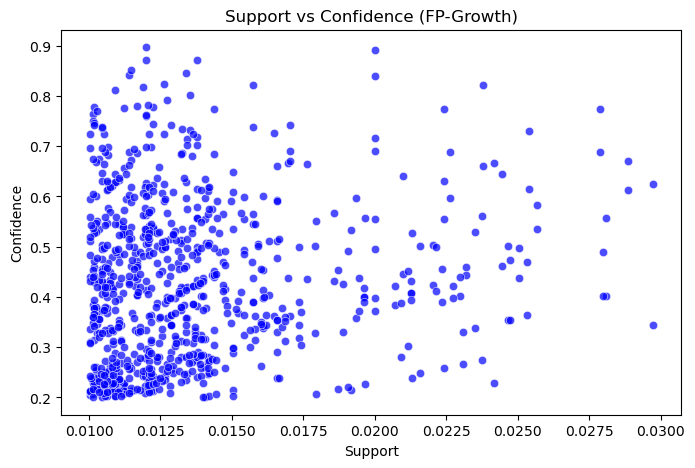

In [ ]:
# Support vs Confidence Scatterplot
plt.figure(figsize=(8,5))
sns.scatterplot(data=rules,x='support',y='confidence',alpha=0.7,color='blue')
plt.title('Support vs Confidence (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

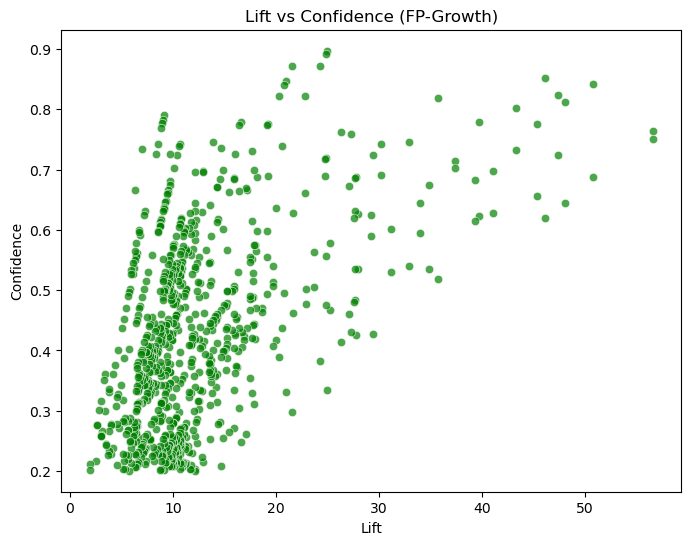

In [8]:
# Lift vs Confidence Scatterplot
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules,x='lift',y='confidence',alpha=0.7,color='green')
plt.title('Lift vs Confidence (FP-Growth)')
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.show()

In [17]:
# Network Graph of Association Rules
def draw_network(rules_df, title):
    G = nx.DiGraph()
    
    for _, row in rules_df.iterrows():
        antecedents = eval(row['antecedents'])  # Convert string to list
        consequents = eval(row['consequents'])  # Convert string to list
        
        for item in antecedents:
            G.add_edge(item, ', '.join(consequents), weight=row['lift'])

    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
    plt.title(title)
    plt.show()

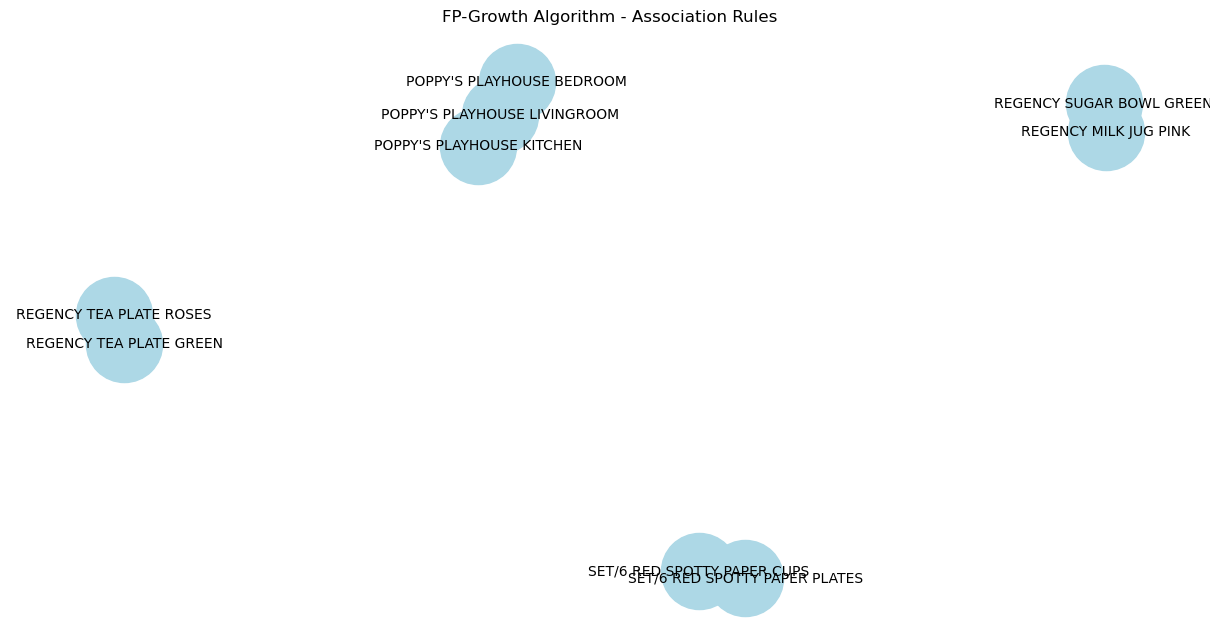

In [18]:
# Draw Network Graph for top 10 rules
draw_network(rules.head(10),'FP-Growth Algorithm - Association Rules')